# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
#from ddpg_agent import Agent
import os
import pickle
import time

In [3]:
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. DDPG Agent



In [ ]:
from ddpg_agent import Agent


In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
agent = Agent(state_size=states.shape[1], action_size=brain.vector_action_space_size, random_seed=10)

### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

In [ ]:
def ddpg(n_episodes=2000, max_t=700):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
count = 0
while count < 100:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
    count += 1
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


In [ ]:
count = 0
print(env_info.vector_observations[0])
prev_state = env_info.vector_observations[0]
while count < 1000:
    actions = np.zeros(4)   
    env_info = env.step(actions)[brain_name] 
    state = env_info.vector_observations[0]
    diff = prev_state - state
    for i in range(len(diff)):
        if diff[i] > 0.1 or diff[i] < -0.1:
            print(i, state[i], diff[i], "\n", end="")
    #print(diff)
    prev_state = state
    count += 1

[-3.15298271 -2.3195889  -0.86513889  0.88603932 -0.42881852 -0.07677598
 -0.15860187  0.23414105 -0.22716455  0.62277883  1.62540495 -1.78766227
 -1.26315737 -6.12472534 -6.99647522 -1.69384503  0.98308623 -0.09785063
 -0.14788438 -0.04579335 -0.90606833  0.99373901  0.15973273  3.16535211
 -3.60363293  2.64854956  2.57726669 -1.          7.57348585  0.
  1.          0.         -0.53301406]
0 -2.9916419982910156 -0.16134071350097656 
1 -2.4893417358398438 0.169752836227417 
7 0.08079557120800018 0.1533454805612564 
9 0.7831388711929321 -0.16036003828048706 
10 2.207850933074951 -0.5824459791183472 
11 -2.302361249923706 0.5146989822387695 
12 -1.1032382249832153 -0.1599191427230835 
13 -5.85020637512207 -0.2745189666748047 
14 -7.296056747436523 0.29958152770996094 
21 0.4885081946849823 0.5052308142185211 
22 -0.088546983897686 0.24827971309423447 
23 3.4761605262756348 -0.3108084201812744 
24 -3.9251790046691895 0.3215460777282715 
26 2.2937278747558594 0.283538818359375 
0 -2.77887

2 1.4551514387130737 -0.14554691314697266 
7 -0.47707992792129517 -0.1700979471206665 
9 0.21877217292785645 0.1211010217666626 
10 0.9090828895568848 0.4886835813522339 
11 0.922914981842041 0.24258053302764893 
12 1.6165473461151123 0.6440870761871338 
13 1.6848258972167969 -0.5332870483398438 
15 1.703139066696167 -0.20869779586791992 
20 0.07289938628673553 0.2905384451150894 
21 -0.3070029020309448 0.21096262335777283 
22 1.6570414304733276 -0.10515403747558594 
26 -1.8250865936279297 0.29103660583496094 
7 -0.2733685076236725 -0.20371142029762268 
10 0.5112248063087463 0.3978580832481384 
11 0.560738205909729 0.362176775932312 
12 0.9027413725852966 0.7138059735298157 
13 2.1959800720214844 -0.5111541748046875 
15 1.881509780883789 -0.17837071418762207 
20 -0.17963829636573792 0.25253768265247345 
21 -0.46464845538139343 0.1576455533504486 
26 -2.113597869873047 0.2885112762451172 
7 -0.03953626751899719 -0.2338322401046753 
10 0.22175873816013336 0.289466068148613 
11 0.12556512

10 0.683972954750061 0.2687668204307556 
11 0.6952632665634155 0.19840633869171143 
12 -0.6886045336723328 -0.18599742650985718 
14 -5.983338356018066 -0.13325929641723633 
21 -0.24000777304172516 -0.1150359958410263 
23 0.5205180048942566 0.15134435892105103 
24 1.5543359518051147 0.6884969472885132 
26 -5.879337310791016 0.20590591430664062 
28 5.425256252288818 0.21497154235839844 
10 0.41599777340888977 0.26797518134117126 
11 0.46422457695007324 0.23103868961334229 
12 -0.5191382169723511 -0.1694663166999817 
21 -0.12730786204338074 -0.11269991099834442 
23 0.3848821818828583 0.13563582301139832 
24 0.8525480031967163 0.7017879486083984 
26 -6.07710075378418 0.19776344299316406 
28 5.202773094177246 0.22248315811157227 
10 0.1509217768907547 0.26507599651813507 
11 0.21198512613773346 0.2522394508123398 
12 -0.35830017924308777 -0.1608380377292633 
21 -0.016503287479281425 -0.11080457456409931 
23 0.2578728497028351 0.1270093321800232 
24 0.1434175819158554 0.7091304212808609 
26 

7 0.26043739914894104 -0.1859201118350029 
10 -1.0754477977752686 0.31790924072265625 
11 -0.6116836071014404 0.2774828374385834 
12 -0.8602580428123474 0.6647491753101349 
13 2.2141151428222656 0.5127105712890625 
15 0.6370836496353149 0.14486587047576904 
20 0.1200418770313263 0.22660541534423828 
21 0.445604532957077 0.1376846730709076 
23 -8.744481086730957 0.17285442352294922 
25 -2.0977959632873535 -0.12433004379272461 
28 0.008209831081330776 0.2976158494129777 
0 1.1260185241699219 0.10642623901367188 
2 0.9241224527359009 0.10209763050079346 
7 0.41908159852027893 -0.1586441993713379 
10 -1.4591138362884521 0.3836660385131836 
11 -0.8240563869476318 0.2123727798461914 
12 -1.4548945426940918 0.5946364998817444 
13 1.6787471771240234 0.5353679656982422 
15 0.47028833627700806 0.16679531335830688 
20 -0.1139039695262909 0.2339458465576172 
21 0.2763979732990265 0.16920655965805054 
25 -1.9896337985992432 -0.10816216468811035 
28 -0.2894173860549927 0.29762721713632345 
0 0.98562

0 -2.680095672607422 0.21402740478515625 
1 -2.7759485244750977 -0.17536687850952148 
7 0.05310478433966637 0.12158859148621559 
9 -0.7648553252220154 -0.12820559740066528 
10 -2.491657257080078 -0.5796542167663574 
11 2.070189952850342 0.2747509479522705 
12 0.6235861778259277 -0.3491893410682678 
13 -5.451101303100586 0.3681297302246094 
14 -7.751068115234375 -0.2941551208496094 
21 0.1371043175458908 0.25293101370334625 
22 -0.04376897215843201 0.1350124552845955 
23 -4.481781482696533 -0.2768077850341797 
24 3.4542393684387207 0.2849855422973633 
26 -6.9428253173828125 -0.14305686950683594 
28 -3.97456693649292 0.26104235649108887 
0 -2.850431442260742 0.1703357696533203 
1 -2.627411365509033 -0.14853715896606445 
7 -0.07271405309438705 0.12581883743405342 
9 -0.6355017423629761 -0.1293535828590393 
10 -1.956916332244873 -0.5347409248352051 
11 1.7117830514907837 0.3584069013595581 
12 0.8830623626708984 -0.2594761848449707 
13 -5.780467987060547 0.32936668395996094 
14 -7.49121952

0 -1.4081192016601562 -0.2217426300048828 
11 -1.052644968032837 -0.20764422416687012 
13 -5.296499252319336 -0.3332653045654297 
20 -0.2090149223804474 0.25590403378009796 
22 -0.26298660039901733 -0.14716807007789612 
23 3.9539237022399902 -0.37066221237182617 
24 -0.95345139503479 0.4967113435268402 
26 -3.5191287994384766 -0.2648468017578125 
28 -7.184409141540527 0.13589715957641602 
0 -1.1873722076416016 -0.2207469940185547 
11 -0.8547852635383606 -0.19785970449447632 
13 -4.9458160400390625 -0.35068321228027344 
14 -7.364499568939209 0.10891866683959961 
20 -0.5130592584609985 0.30404433608055115 
22 -0.10755540430545807 -0.15543119609355927 
23 4.272519111633301 -0.31859540939331055 
24 -1.4607418775558472 0.5072904825210571 
26 -3.249410629272461 -0.2697181701660156 
28 -7.310358047485352 0.12594890594482422 
0 -0.9693088531494141 -0.2180633544921875 
11 -0.668089747428894 -0.18669551610946655 
13 -4.58104133605957 -0.3647747039794922 
14 -7.492150783538818 0.12765121459960938

### 4. DDPG Agent



When finished, you can close the environment.

In [41]:
env.close()

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [7]:
f = open('all_scores_1551523236.p', 'rb') 
scores = pickle.load(f)
f.close()
print(scores)

[1.3454999699257315, 1.1954999732784928, 1.2404999722726644, 1.3179999705404044, 1.4569999674335121, 0.8774999803863466, 0.7954999822191894, 1.0464999766089023, 1.6789999624714256, 2.02099995482713, 2.5029999440535904, 2.8369999365881085, 3.132999929971993, 3.339499925356358, 4.011999910324812, 4.33749990304932, 5.372499879915267, 4.7739998932927845, 6.24099986050278, 6.020499865431338, 5.725999872013927, 6.70849985005334, 6.84049984710291, 7.946499822381884, 7.767999826371669, 9.326999791525305, 8.671499806176872, 6.919999845325947, 9.106499796453864, 9.349999791011214, 10.33999976888299, 10.746999759785831, 11.81249973597005, 11.134499751124531, 12.308999724872411, 13.880499689746648, 12.070999730192124, 13.35999970138073, 14.44749967707321, 12.53299971986562, 13.941999688372016, 14.067999685555696, 15.307999657839536, 15.853999645635486, 16.535499630402775, 14.939999666064978, 18.20749959303066, 16.173499638494103, 17.741499603446574, 17.48049960928038, 17.91899959947914, 16.6579996

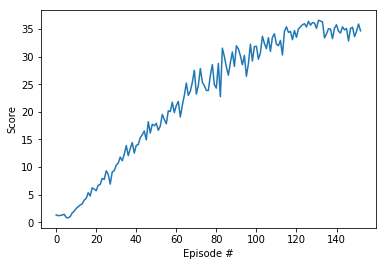

<Figure size 432x288 with 0 Axes>

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
plt.savefig('ppo-30.png')